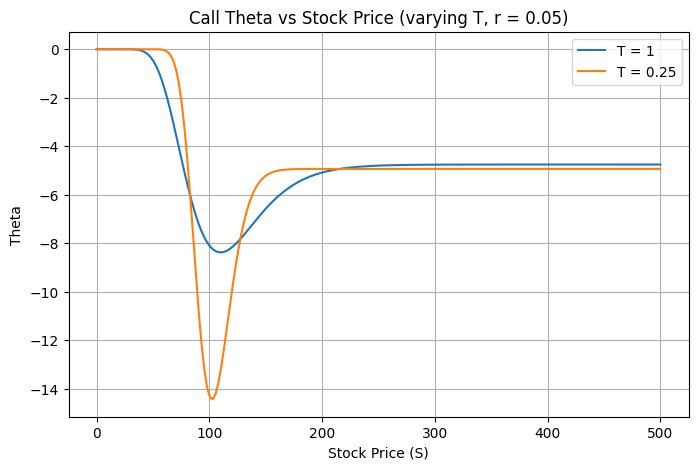

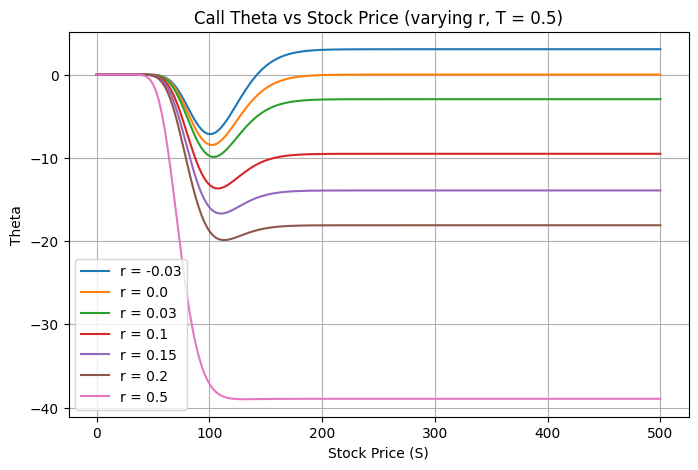

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call theta
def call_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
    return term1 + term2

# ---- User adjustable parameters ----
K = 100
sigma = 0.3
S_values = np.linspace(0.1,500, 200)

# Input ranges:
T_list =   [1,0.25]# [10,5,3,2,1.0, 0.5, 0.25, 0.05]     # Range of maturities
r_list = [-0.03, 0.00, 0.03, 0.10,0.15,0.2,0.5]  # Range of interest rates
sigma_list = [0.1,0.2,0.3,0.5]
# ---- Plot theta vs S for varying T (fixed r) ----
r_fixed = 0.05  # choose a fixed r for this plot
plt.figure(figsize=(8,5))
for T in T_list:
    theta_vals = [call_theta(S, K, T, r_fixed, sigma) for S in S_values]
    plt.plot(S_values, theta_vals, label=f"T = {T}")
plt.title(f"Call Theta vs Stock Price (varying T, r = {r_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot theta vs S for varying r (fixed T) ----
T_fixed = 0.5  # choose a fixed T for this plot
plt.figure(figsize=(8,5))
for r in r_list:
    theta_vals = [call_theta(S, K, T_fixed, r, sigma) for S in S_values]
    plt.plot(S_values, theta_vals, label=f"r = {r}")
plt.title(f"Call Theta vs Stock Price (varying r, T = {T_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()

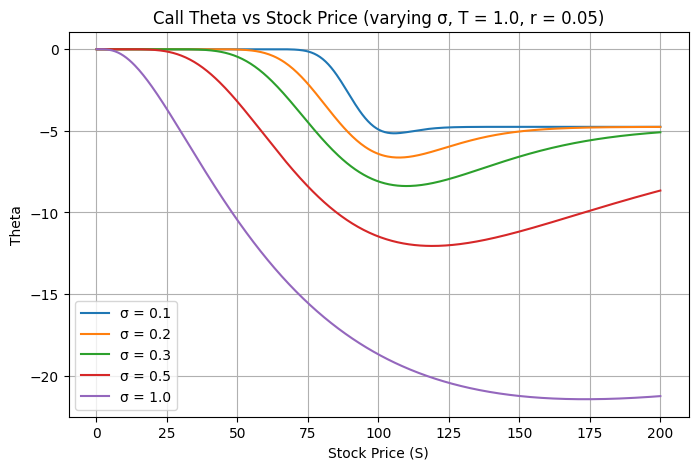

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Black-Scholes call theta ---
def call_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
    return term1 + term2


# ---- Parameters ----
K = 100
S_values = np.linspace(0.1, 200, 400)

# Lists to vary
sigma_list = [0.1, 0.2, 0.3, 0.5, 1.0]
r_fixed = 0.05
T_fixed = 1.0

# ---- Plot theta vs S for varying sigma (fixed T and r) ----
plt.figure(figsize=(8,5))
for sigma in sigma_list:
    theta_vals = [call_theta(S, K, T_fixed, r_fixed, sigma) for S in S_values]
    plt.plot(S_values, theta_vals, label=f"σ = {sigma}")
    
plt.title(f"Call Theta vs Stock Price (varying σ, T = {T_fixed}, r = {r_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
'''    
    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)


Term 1 tends to 0 for large S, Term 2 is smaller for large T and does not tend to 0, so RHS asymptope is lighter for large T. RHS asymptopes are to different lines

For very large LHS d_1 in value, Phi(d_1) ~ phi(d_1)/d_1, so LHS asymptopte is heavier for large T. To see this, do f(T_1,S)/f(T_2,s)

Note also, the maximmum point is at S = exp( (r+sigma^2/2)t), at which, d_1  = (sigma + 2r/sigma) sqrt(t), so max point consistently just go down and right. O(K*sigma/root(t))


You can make all the same arguments for sigma! Note that N(d_2) ~ 1 - n(d_2)/d_2  for large d_2. Bigger sigma, fatter asymptopes







Now for changing r, increasing r increases d1, decreases terms 1 magnitude, decrease term 2 magnitude negligible
'''

'    \n    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))\n    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)\n\n\nTerm 1 tends to 0 for large S, Term 2 is smaller for large T and does not tend to 0, so RHS asymptope is lighter for large T. RHS asymptopes are to different lines\n\nFor very large LHS d_1 in value, Phi(d_1) ~ phi(d_1)/d_1, so LHS asymptopte is heavier for large T. To see this, do f(T_1,S)/f(T_2,s)\n\nNote also, the maximmum point is at S = exp( (r+sigma^2/2)t), at which, d_1  = (sigma + 2r/sigma) sqrt(t), so max point consistently just go down and right. O(K*sigma/root(t))\n\n\nYou can make all the same arguments for sigma! Note that N(d_2) ~ 1 - n(d_2)/d_2  for large d_2. Bigger sigma, fatter asymptopes\n\n\n\n\n\n\n\nNow for changing r, increasing r increases d1, decreases terms 1 magnitude, decrease term 2 magnitude negligible\n'

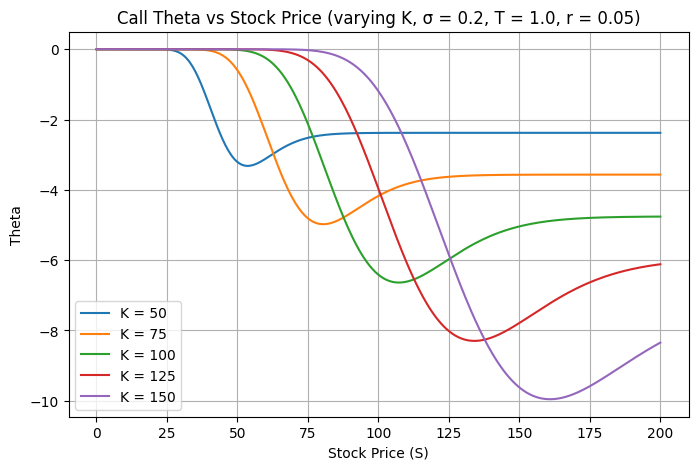

In [4]:
# ---- Parameters ----
S_values = np.linspace(0.1, 200, 400)

# Lists to vary
K_list = [50, 75, 100, 125, 150]
sigma_fixed = 0.2
r_fixed = 0.05
T_fixed = 1.0

# ---- Plot theta vs S for varying K (fixed sigma, T, r) ----
plt.figure(figsize=(8,5))
for K in K_list:
    theta_vals = [call_theta(S, K, T_fixed, r_fixed, sigma_fixed) for S in S_values]
    plt.plot(S_values, theta_vals, label=f"K = {K}")
    
plt.title(f"Call Theta vs Stock Price (varying K, σ = {sigma_fixed}, T = {T_fixed}, r = {r_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()
